In [38]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [39]:
pwd

'/Users/yuanruizhu/Desktop/cooking-main/modeling'

###  DataGenerating

In [40]:
main_df = pd.read_csv("../data/Archive/Cooking Game Suggested Tips  - BBS21-Phase2-Disruption.csv")
main_df = main_df[['ResponseId', 'Group #']].rename(columns = {"Group #": "label"})
main_df

,ResponseId,label
0,R_0IcuUZHN9dKfH0Z,3.0
1,R_0VXJLbkyY71lN4J,1.0
2,R_125AKwC51ygjjQk,3.0
3,R_12Dt0DJZNmFiKry,1.0
4,R_12QMTavRK76D6Gq,3.0
...,...,...
1296,R_2uO0jriCjacBmex,NaN
1297,R_2CVv4NSDE4SkU22,NaN
1298,R_pQcs83rkz3Z2mxb,NaN
1299,R_DOwVqDWhTsSnR9n,3.0


In [41]:
df = pd.read_csv("../data/Archive/combined_phase2.csv")
df = df.rename(columns={"best_tip":"label"}).drop(columns = ['label']).merge(main_df, on = 'ResponseId')
df

,ResponseId,round,tick,orderId,taskId,taskTicks,workerId,workerTicks,label
0,R_0DNcJqALC3UG9Db,1,1,1,1,2,1,0,2.0
1,R_0DNcJqALC3UG9Db,1,1,2,1,2,2,0,2.0
2,R_0DNcJqALC3UG9Db,1,1,3,1,2,3,0,2.0
3,R_0DNcJqALC3UG9Db,1,2,0,0,0,0,0,2.0
4,R_0DNcJqALC3UG9Db,1,2,0,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...
140812,R_z6DSJfELElPHABP,6,34,0,0,0,0,0,3.0
140813,R_z6DSJfELElPHABP,6,34,0,0,0,0,0,3.0
140814,R_z6DSJfELElPHABP,6,35,4,3,2,2,0,3.0
140815,R_z6DSJfELElPHABP,6,35,0,0,0,0,0,3.0


In [42]:
s1 = pd.read_csv("../data/Archive/combined_phase2_s1.csv")
s1 = s1.rename(columns={"best_tip":"label"}).drop(columns = ['label']).merge(main_df, on = 'ResponseId')
s1

,ResponseId,round,tick,orderId,taskId,taskTicks,workerId,workerTicks,label
0,R_09f8RCjNyCadwPv,1,1,1,1,2,1,0,3.0
1,R_09f8RCjNyCadwPv,1,1,2,1,2,2,0,3.0
2,R_09f8RCjNyCadwPv,1,1,3,1,2,3,0,3.0
3,R_09f8RCjNyCadwPv,1,2,0,0,0,0,0,3.0
4,R_09f8RCjNyCadwPv,1,2,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...
142615,R_yURk5fqt6tj7kjL,6,36,0,0,0,0,0,3.0
142616,R_yURk5fqt6tj7kjL,6,36,0,0,0,0,0,3.0
142617,R_yURk5fqt6tj7kjL,6,37,4,3,2,2,0,3.0
142618,R_yURk5fqt6tj7kjL,6,37,0,0,0,0,0,3.0


In [43]:
t1 = pd.read_csv("../data/Archive/combined_phase2_t1.csv")
t1 = t1.rename(columns={"best_tip":"label"}).drop(columns = ['label']).merge(main_df, on = 'ResponseId')
t1

,ResponseId,round,tick,orderId,taskId,taskTicks,workerId,workerTicks,label
0,R_0HBxBV8U696D9QJ,1,1,1,1,2,1,0,3.0
1,R_0HBxBV8U696D9QJ,1,1,2,1,2,2,0,3.0
2,R_0HBxBV8U696D9QJ,1,1,3,1,2,3,0,3.0
3,R_0HBxBV8U696D9QJ,1,2,0,0,0,0,0,3.0
4,R_0HBxBV8U696D9QJ,1,2,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...
140536,R_zZQIbE0LFD13yRX,6,37,0,0,0,0,0,3.0
140537,R_zZQIbE0LFD13yRX,6,37,0,0,0,0,0,3.0
140538,R_zZQIbE0LFD13yRX,6,38,4,3,2,2,0,3.0
140539,R_zZQIbE0LFD13yRX,6,38,0,0,0,0,0,3.0


In [44]:
NUM_FEATURE = 10
from tqdm import tqdm
def get_feature(df):
    ids = []
    rounds = []
    chef_chop = []
    chef_cook = []
    chef_plate = []
    
    sou_chop = []
    sou_cook = []
    sou_plate = []
    
    server_chop = []
    server_cook = []
    server_plate = []

    idle = []
    
    label = []
    label_2 = []
    
    for player in tqdm(set(np.array(df["ResponseId"]))):
        for i in np.arange(1,7):
            tem = df[(df["ResponseId"] == player) & (df["round"] == i)]
            if len(tem) != 0: # no response there
                ids.append(player)
                rounds.append(i)
                
                label.append( df[(df["ResponseId"] == player)]["label"].iloc[0])

                chef_chop.append( sum((tem["workerId"] == 1) & (tem["taskId"] == 1)) )
                chef_cook.append(sum((tem["workerId"] == 1) & (tem["taskId"] == 2)) )
                chef_plate.append( sum((tem["workerId"] == 1) & (tem["taskId"] == 3)) )

                sou_chop.append( sum((tem["workerId"] == 2) & (tem["taskId"] == 1)) )
                sou_cook.append( sum((tem["workerId"] == 2) & (tem["taskId"] == 2)) )
                sou_plate.append( sum((tem["workerId"] == 2) & (tem["taskId"] == 3)) )

                server_chop.append( sum((tem["workerId"] == 3) & (tem["taskId"] == 1)) )
                server_cook.append( sum((tem["workerId"] == 3) & (tem["taskId"] == 2)) )
                server_plate.append( sum((tem["workerId"] == 3) & (tem["taskId"] == 3)) )

                idle.append( sum((tem["workerId"] == 0) & (tem["taskId"] == 0)) )
            

    d = {
        "ResponseId": ids,
        "round": rounds,
        "label_1": label,

        "chef_chop" : chef_chop,
        "chef_cook" : chef_cook,
        "chef_plate" : chef_plate,

        "sou_chop" : sou_chop,
        "sou_cook" : sou_cook,
        "sou_plate" : sou_plate,

        "server_chop" : server_chop,
        "server_cook" : server_cook,
        "server_plate" : server_plate,

        'idle' : idle
    }
    return pd.DataFrame(d)

In [45]:
X = get_feature(df)
X

X_s1 = get_feature(s1)
X_t1 = get_feature(t1)

100%|██████████| 243/243 [00:24<00:00,  9.78it/s]


In [46]:
X1 = X.groupby("ResponseId", as_index=False).agg(lambda x:x.iloc[0])
X1

X1_s1 = X_s1.groupby("ResponseId", as_index=False).agg(lambda x:x.iloc[0])
X1_t1 = X_t1.groupby("ResponseId", as_index=False).agg(lambda x:x.iloc[0])

In [90]:
X1_s1

,ResponseId,round,label_1,chef_chop,chef_cook,chef_plate,sou_chop,sou_cook,sou_plate,server_chop,server_cook,server_plate,idle
0,R_09f8RCjNyCadwPv,1,3.0,1,2,1,1,2,1,2,0,2,63
1,R_0OFNLlTMtF6YuXf,1,2.0,2,2,1,1,2,0,1,0,3,60
2,R_0SrUdDhR075sWyZ,1,2.0,2,3,0,1,1,0,1,0,4,48
3,R_0dkmFxzVGbM4H17,1,3.0,1,5,0,5,1,2,1,0,2,64
4,R_0kTTXuzLnqZsQzT,1,3.0,2,7,0,4,1,0,1,0,5,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,R_wZQyUQosD7jAiC5,1,3.0,2,2,1,1,2,2,1,0,1,66
241,R_x3LIwiuSIOWPNN7,1,3.0,2,2,1,1,1,1,1,1,2,54
242,R_yBZYkqf9LaJZxFn,1,3.0,2,5,0,5,2,2,1,0,3,43
243,R_yK1zeitEqOJSgEx,1,3.0,2,2,0,1,1,2,1,1,2,57


In [47]:
X2 = X.groupby("ResponseId", as_index=False).agg(lambda x:x.iloc[1])
dat = X2.merge(X1, left_on="ResponseId", right_on="ResponseId")
dat.pop("round_x")
dat.pop("round_y")
dat.pop("label_1_y")
# dat.pop("label_2_y")
num_feature = NUM_FEATURE
bef = dat.iloc[:,np.arange(2, 2 + num_feature)]
aft = dat.iloc[:,np.arange(2 + num_feature, dat.shape[1])]

for i in np.arange(num_feature):
    dat[i] = aft.iloc[:,i] - bef.iloc[:,i]
dat.columns
dat

X2_s1 = X_s1.groupby("ResponseId", as_index=False).agg(lambda x:x.iloc[1])
dat_s1 = X2_s1.merge(X1_s1, left_on="ResponseId", right_on="ResponseId")
dat_s1.pop("round_x")
dat_s1.pop("round_y")
dat_s1.pop("label_1_y")
# dat.pop("label_2_y")
num_feature = NUM_FEATURE
bef = dat_s1.iloc[:,np.arange(2, 2 + num_feature)]
aft = dat_s1.iloc[:,np.arange(2 + num_feature, dat_s1.shape[1])]

for i in np.arange(num_feature):
    dat_s1[i] = aft.iloc[:,i] - bef.iloc[:,i]
dat_s1.columns
dat_s1

X2_t1 = X_t1.groupby("ResponseId", as_index=False).agg(lambda x:x.iloc[1])
dat_t1 = X2_t1.merge(X1_t1, left_on="ResponseId", right_on="ResponseId")
dat_t1.pop("round_x")
dat_t1.pop("round_y")
dat_t1.pop("label_1_y")
# dat.pop("label_2_y")
num_feature = NUM_FEATURE
bef = dat_t1.iloc[:,np.arange(2, 2 + num_feature)]
aft = dat_t1.iloc[:,np.arange(2 + num_feature, dat_t1.shape[1])]

for i in np.arange(num_feature):
    dat_t1[i] = aft.iloc[:,i] - bef.iloc[:,i]
dat_t1.columns
dat_t1

,ResponseId,label_1_x,chef_chop_x,chef_cook_x,chef_plate_x,sou_chop_x,sou_cook_x,sou_plate_x,server_chop_x,server_cook_x,...,0,1,2,3,4,5,6,7,8,9
0,R_0HBxBV8U696D9QJ,3.0,1,3,0,1,1,1,2,0,...,0,4,0,0,0,1,0,0,-1,-1
1,R_0SZ9OfuWvmqeMqR,3.0,4,3,0,0,1,4,0,0,...,-2,-1,2,1,0,-2,1,1,0,6
2,R_10DdLv5uPLAfpAR,3.0,1,4,0,1,1,1,2,0,...,0,-1,0,0,0,-1,0,0,2,0
3,R_10Ggl6dEPfo9ipw,3.0,1,3,0,1,1,1,2,0,...,1,-1,1,0,0,2,-1,1,-3,15
4,R_10HkPUkR6o0qDFT,3.0,1,3,0,1,1,1,2,0,...,0,-1,1,0,1,0,0,0,-1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,R_wZ8QFIOF6tAu7aV,3.0,2,3,0,1,1,2,1,0,...,0,-1,1,0,0,1,0,1,-2,-12
239,R_yZJ03FFfe8jfazn,3.0,1,3,0,1,1,1,2,0,...,1,0,0,0,0,-1,-1,0,1,6
240,R_ykkhkGYu1KpIM8h,2.0,2,2,0,1,1,8,1,1,...,0,0,0,0,0,-5,0,0,0,2
241,R_ym9gyf6T2XORxAt,3.0,2,2,0,1,1,0,1,1,...,0,-1,2,0,1,1,0,0,-3,-3


In [48]:
dat

,ResponseId,label_1_x,chef_chop_x,chef_cook_x,chef_plate_x,sou_chop_x,sou_cook_x,sou_plate_x,server_chop_x,server_cook_x,...,0,1,2,3,4,5,6,7,8,9
0,R_0DNcJqALC3UG9Db,2.0,2,3,0,2,1,1,0,0,...,0,-1,0,-1,0,1,1,1,-1,0
1,R_0HbfbDtnkUIRbvH,3.0,1,4,0,2,0,0,1,0,...,1,-1,0,0,1,0,-1,0,0,-6
2,R_0cVkkjfJMy8V6P7,3.0,1,3,0,3,3,0,1,0,...,1,-1,2,-2,-2,2,0,1,-4,15
3,R_10OZ3Fgz4TJo8Vx,2.0,2,2,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,-1,0
4,R_11WSDnMOeKXakQH,2.0,3,2,0,3,2,1,1,0,...,-2,0,0,-1,-1,1,0,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,R_xlnJEPOkxxHspJT,2.0,1,3,0,1,1,1,2,0,...,0,0,0,0,0,0,0,0,0,3
237,R_yNJaIImQ7EY3J5v,2.0,1,3,0,1,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
238,R_yqY6xKo4dUHco6d,3.0,1,3,0,1,1,1,2,0,...,0,0,0,0,0,1,0,0,-1,3
239,R_yrKr3inrXDL5Lvb,3.0,1,7,0,1,1,1,2,0,...,1,-3,1,0,0,0,-1,1,-2,12


In [49]:
df[df["ResponseId"] == "R_0DNcJqALC3UG9Db"]

,ResponseId,round,tick,orderId,taskId,taskTicks,workerId,workerTicks,label
0,R_0DNcJqALC3UG9Db,1,1,1,1,2,1,0,2.0
1,R_0DNcJqALC3UG9Db,1,1,2,1,2,2,0,2.0
2,R_0DNcJqALC3UG9Db,1,1,3,1,2,3,0,2.0
3,R_0DNcJqALC3UG9Db,1,2,0,0,0,0,0,2.0
4,R_0DNcJqALC3UG9Db,1,2,0,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...
616,R_0DNcJqALC3UG9Db,6,43,0,0,0,0,0,2.0
617,R_0DNcJqALC3UG9Db,6,43,0,0,0,0,0,2.0
618,R_0DNcJqALC3UG9Db,6,44,4,3,2,2,0,2.0
619,R_0DNcJqALC3UG9Db,6,44,0,0,0,0,0,2.0


In [50]:
jerry = t1
for r in np.arange(1,2):
    for w in np.arange(1, 4):
        for t in np.arange(1, 4):
            print(r,w,t)
            roundid = r
            taskid = t
            workerid = w
            rounds = jerry[jerry["round"]==roundid]
            if rounds[(rounds["taskId"]==taskid) & (rounds["workerId"]==workerid)]["ResponseId"].shape[0] != 0:
                a = rounds[(rounds["taskId"]==taskid) & (rounds["workerId"]==workerid)]["ResponseId"].shape[0] / len(rounds[(rounds["taskId"]==taskid) & (rounds["workerId"]==workerid)]["ResponseId"].unique())
            else: 
                a= 0
            print(a)

1 1 1
1.759493670886076
1 1 2
2.8595041322314048
1 1 3
1.404040404040404
1 2 1
1.537190082644628
1 2 2
1.5481171548117154
1 2 3
1.881720430107527
1 3 1
1.3257918552036199
1 3 2
1.025
1 3 3
2.8904761904761904


### Features Visualization Joint

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
# # figure, axis = plt.subplots(4, 27)
# df0, df1, df2, df3 = dat[dat["label_1_x"]==0], dat[dat["label_1_x"]==1], dat[dat["label_1_x"]==2], dat[dat["label_1_x"]==3]
# kin = "hist"
# sns.displot(data=dat, x="chef_chop_x", col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x="chef_chop_y", col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x="chef_cook_x", col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x="chef_cook_y", col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x="chef_plate_x", col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x="chef_plate_y", col="label_1_x", kind=kin, stat="probability")

# sns.displot(data=dat, x="sou_chop_x", col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x="sou_chop_y", col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x="sou_cook_x", col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x="sou_cook_y", col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x="sou_plate_x", col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x="sou_plate_y", col="label_1_x", kind=kin, stat="probability")

# sns.displot(data=dat, x="server_chop_x", col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x="server_chop_y", col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x="server_cook_x", col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x="server_cook_y", col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x="server_plate_x", col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x="server_plate_y", col="label_1_x", kind=kin, stat="probability")

# sns.displot(data=dat, x="idle_x", col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x="idle_y", col="label_1_x", kind=kin, stat="probability")


# sns.displot(data=dat, x=0, col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x=1, col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x=2, col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x=3, col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x=4, col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x=5, col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x=6, col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x=7, col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x=8, col="label_1_x", kind=kin, stat="probability")
# sns.displot(data=dat, x=9, col="label_1_x", kind=kin, stat="probability")


### TRAIN VAL SPLIT

In [52]:
dat = dat.sample(frac=1, random_state=42)
dat

,ResponseId,label_1_x,chef_chop_x,chef_cook_x,chef_plate_x,sou_chop_x,sou_cook_x,sou_plate_x,server_chop_x,server_cook_x,...,0,1,2,3,4,5,6,7,8,9
24,R_1JDSVNry9Dw9OT9,1.0,5,5,0,1,2,1,1,0,...,-1,1,0,0,-1,-1,0,0,2,3
6,R_12Lv8qnpFy9Vt0s,1.0,3,2,0,2,2,3,2,1,...,-1,0,1,0,-1,-2,-1,0,-3,4
222,R_eXIJw6uOCxUvYeR,3.0,2,2,0,1,1,2,1,1,...,-1,1,1,1,1,-1,0,0,0,-2
208,R_RElq0Da0R5awmMV,3.0,2,3,0,2,1,0,0,0,...,0,-1,1,-1,0,1,1,1,-2,3
236,R_xlnJEPOkxxHspJT,2.0,1,3,0,1,1,1,2,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,R_2Yg1VJrnusl9XTH,3.0,3,4,0,1,1,1,1,0,...,2,2,0,0,0,0,0,0,0,-4
14,R_1FeTRLYeZzRxepn,3.0,2,3,0,2,1,0,0,0,...,-2,1,0,2,-1,0,0,0,0,9
92,R_2QmoU1bwH81BIb8,3.0,1,3,0,1,1,1,2,0,...,0,1,0,0,0,0,0,0,0,-1
179,R_3rZp2BTjwcnNGPw,3.0,1,3,0,1,1,1,2,0,...,0,-1,1,1,0,0,-1,1,-1,18


In [54]:
FEATURES = ["ResponseId","label_1_x","chef_cook_x", "chef_cook_y", "sou_chop_y", "sou_plate_x","sou_plate_y", 
            "server_chop_x", "server_plate_x", "server_plate_y", "idle_x", "idle_y",
            0,1,2,7,8,9]
dat = dat[FEATURES]
dat.shape

dat_s1, dat_t1 = dat_s1[FEATURES], dat_t1[FEATURES]

In [55]:
dat.columns = dat.columns.astype("str")
dat_s1.columns = dat_s1.columns.astype("str")
dat_t1.columns = dat_t1.columns.astype("str")

In [56]:
# X_train, X_test = dat.iloc[:104,2:], dat.iloc[70:,2:]
# y_train_1, y_test_1 = dat.iloc[:104,1], dat.iloc[70:,1]
# y_train_2, y_test_2 = dat.iloc[:70,2], dat.iloc[130:,2]
X_train, X_val = dat.iloc[:190, 2:], dat.iloc[190:, 2:]
y_train, y_val = dat.iloc[:190, 1], dat.iloc[190:,  1]

X_s1, y_s1 = dat_s1.iloc[:, 2:], dat_s1.iloc[:, 1]
X_t1, y_t1 = dat_t1.iloc[:, 2:], dat_t1.iloc[:, 1]

(array([ 17.,  47., 126.]), array([1, 2, 3, 4]), <a list of 3 Patch objects>)

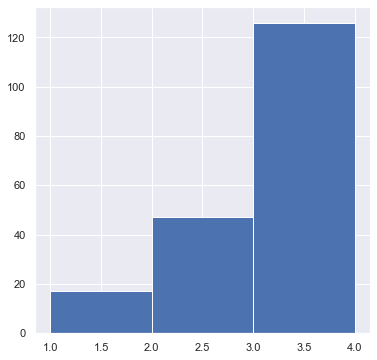

In [57]:
import matplotlib.pyplot as plt
plt.hist(y_train, bins=[1,2,3,4])

### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = { 
    "criterion": ["gini"],
    "n_estimators": [85, 90, 95, 100, 110, 115],
    "max_depth": [3,4,5],
    'min_samples_split': [3,4,5],
    'min_samples_leaf':  [1,2,3],
}

In [22]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [23]:
RF = GridSearchCV(estimator=clf, param_grid = param_grid, cv=5)
# RF = RandomForestClassifier(random_state=42, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=110)
RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [24]:
# clf.score(X_train, y_train)
# RF.score(X_train, y_train)
RF.predict(X_val)

array([3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [25]:
# RF = RandomForestClassifier(random_state=42, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=85) 
# RF.fit(X_train, y_train)

In [26]:
# clf.score(X_val, y_val)
RF.score(X_val, y_val)

0.7450980392156863

In [27]:
RF.best_params_ 

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 85}

### S1+T1

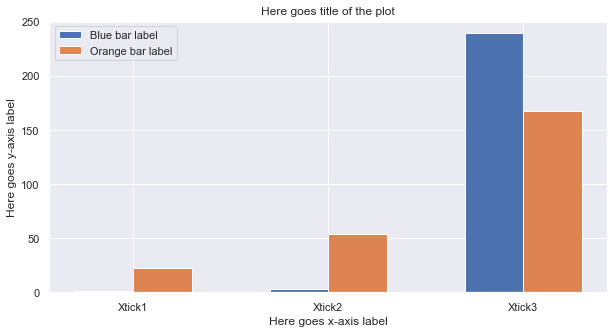

In [58]:
y_pred_s1 = RF.predict(X_s1)
y_pred_t1 = RF.predict(X_t1)

# Numbers of pairs of bars you want
N = 3

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (np.count_nonzero(y_pred_t1==1), np.count_nonzero(y_pred_t1==2), np.count_nonzero(y_pred_t1==3))
# Specify the values of orange bars (height)
orange_bar = (np.count_nonzero(y_t1==1), np.count_nonzero(y_t1==2), np.count_nonzero(y_t1==3))

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Blue bar label')
plt.bar(ind + width, orange_bar, width, label='Orange bar label')

plt.xlabel('Here goes x-axis label')
plt.ylabel('Here goes y-axis label')
plt.title('Here goes title of the plot')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Xtick1', 'Xtick2', 'Xtick3'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [59]:
y_pred_s1 = RF.predict(X_s1)
y_pred_t1 = RF.predict(X_t1)
class0_t1 = y_t1[y_pred_t1 == 3]
class0_s1 = y_s1[y_pred_s1 == 3]
print(len(class0_t1)/len(y_pred_t1), len(class0_s1)/len(y_pred_s1))
print(len(y_pred_t1),print(len(y_pred_s1)))

0.9835390946502057 0.9755102040816327
245
243 None


(0.08368200836820083, 0.2217573221757322, 0.694560669456067)
(0.0794979079497908, 0.22594142259414227, 0.694560669456067)


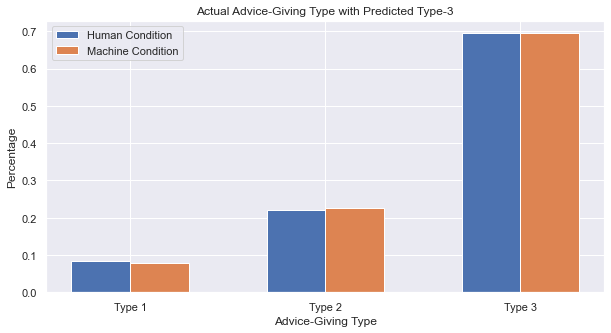

In [60]:
### predicted class-0
y_pred_s1 = RF.predict(X_s1)
y_pred_t1 = RF.predict(X_t1)
class0_t1 = y_t1[y_pred_t1 == 3]
class0_s1 = y_s1[y_pred_s1 == 3]
# Numbers of pairs of bars you want
N = 3

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (np.count_nonzero(class0_t1==1)/len(class0_t1), 
            np.count_nonzero(class0_t1==2)/len(class0_t1), np.count_nonzero(class0_t1==3)/len(class0_t1))
# Specify the values of orange bars (height)
orange_bar = (np.count_nonzero(class0_s1==1)/len(class0_s1), 
            np.count_nonzero(class0_s1==2)/len(class0_s1), np.count_nonzero(class0_s1==3)/len(class0_s1))

print(blue_bar)
print(orange_bar)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Human Condition')
plt.bar(ind + width, orange_bar, width, label='Machine Condition')

plt.xlabel('Advice-Giving Type')
plt.ylabel('Percentage')
plt.title('Actual Advice-Giving Type with Predicted Type-3')


plt.xticks(ind + width / 2, ('Type 1', 'Type 2', 'Type 3'))

plt.legend(loc='best')
plt.savefig("type-3.pdf",dpi=300);

### ROC

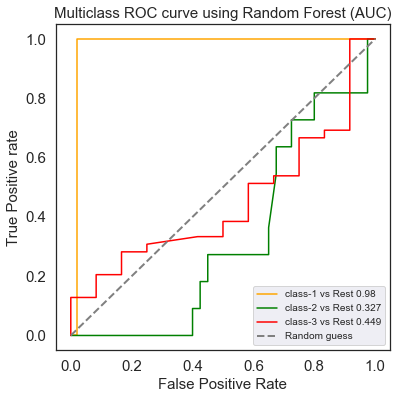

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('seaborn')

from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.metrics import roc_auc_score

pred = RF.predict(X_val)
pred_prob = RF.predict_proba(X_val)
fpr = {}
tpr = {}
thresh ={}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val, pred_prob[:,i], pos_label=i+1)

a = []
classes = RF.classes_
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_val.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_val]
    df_aux['prob'] = pred_prob[:, i]
    df_aux = df_aux.reset_index(drop = True)

    
    # Calculates the ROC AUC OvR
    a.append(round(roc_auc_score(df_aux['class'], df_aux['prob']),3))
#     print(roc_auc_score(df_aux['class'], df_aux['prob']))    
    
sns.set_style("white")
plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label=f'class-1 vs Rest {a[0]}')
plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label=f'class-2 vs Rest {a[1]}')
plt.plot(fpr[2], tpr[2], linestyle='-',color='red', label=f'class-3 vs Rest {a[2]}')

plt.title('Multiclass ROC curve using Random Forest (AUC)',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive rate',fontsize=15)
plt.tick_params(labelsize=15)
sns.set(rc={'figure.figsize':(6,6)})
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='grey', label='Random guess')
# plt.legend(loc='best',fontsize=10)
plt.legend(loc="lower right", fontsize=10)
plt.savefig("RF.pdf",dpi=300);

In [62]:
from sklearn.metrics import classification_report
y_true = y_val
y_pred = RF.predict(X_val)
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.00      0.00      0.00         1
     class 2       0.00      0.00      0.00        11
     class 3       0.76      0.97      0.85        39

    accuracy                           0.75        51
   macro avg       0.25      0.32      0.28        51
weighted avg       0.58      0.75      0.65        51



/Users/yuanruizhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Feature Selection

In [63]:
columns  = {
    "chef_chop_x":"number of chef chop 1",
    "chef_chop_y":"number of chef chop 2",
    "0":"changes of chef chop",

    "chef_cook_x":"number of chef cook 1",
    "chef_cook_y":"number of chef cook 2",
    "1":"changes of chef cook",

    "chef_plate_x":"number of chef plate 1",
    "chef_plate_y":"number of chef plate 2",
    "2":"changes of chef plate",

    "sou_chop_x":"number of sou-chef chop 1",
    "sou_chop_y":"number of sou-chef chop 2",
    "3":"changes of sou-chef chop",

    "sou_cook_x":"number of sou-chef cook 1",
    "sou_cook_y":"number of sou-chef cook 2",
    "4":"changes of sou-chef cook",

    "sou_plate_x":"number of sou-chef plate 1",
    "sou_plate_y":"number of sou-chef plate 2",
    "5":"changes of sou-chef plate",

    "server_chop_x":"number of server chop 1",
    "server_chop_y":"number of server chop 2",
    "6":"changes of server chop",

    "server_cook_x":"number of server cook 1",
    "server_cook_y":"number of server cook 2",
    "7":"changes of server cook",

    "server_plate_x":"number of server plate 1",
    "server_plate_y":"number of server plate 2",
    "8":"changes of server plate",

    "idle_x":"number of idle 1",
    "idle_y":"number of idle 2",
    "9":"changes of idle",
}

X_train = X_train.rename(columns = columns)

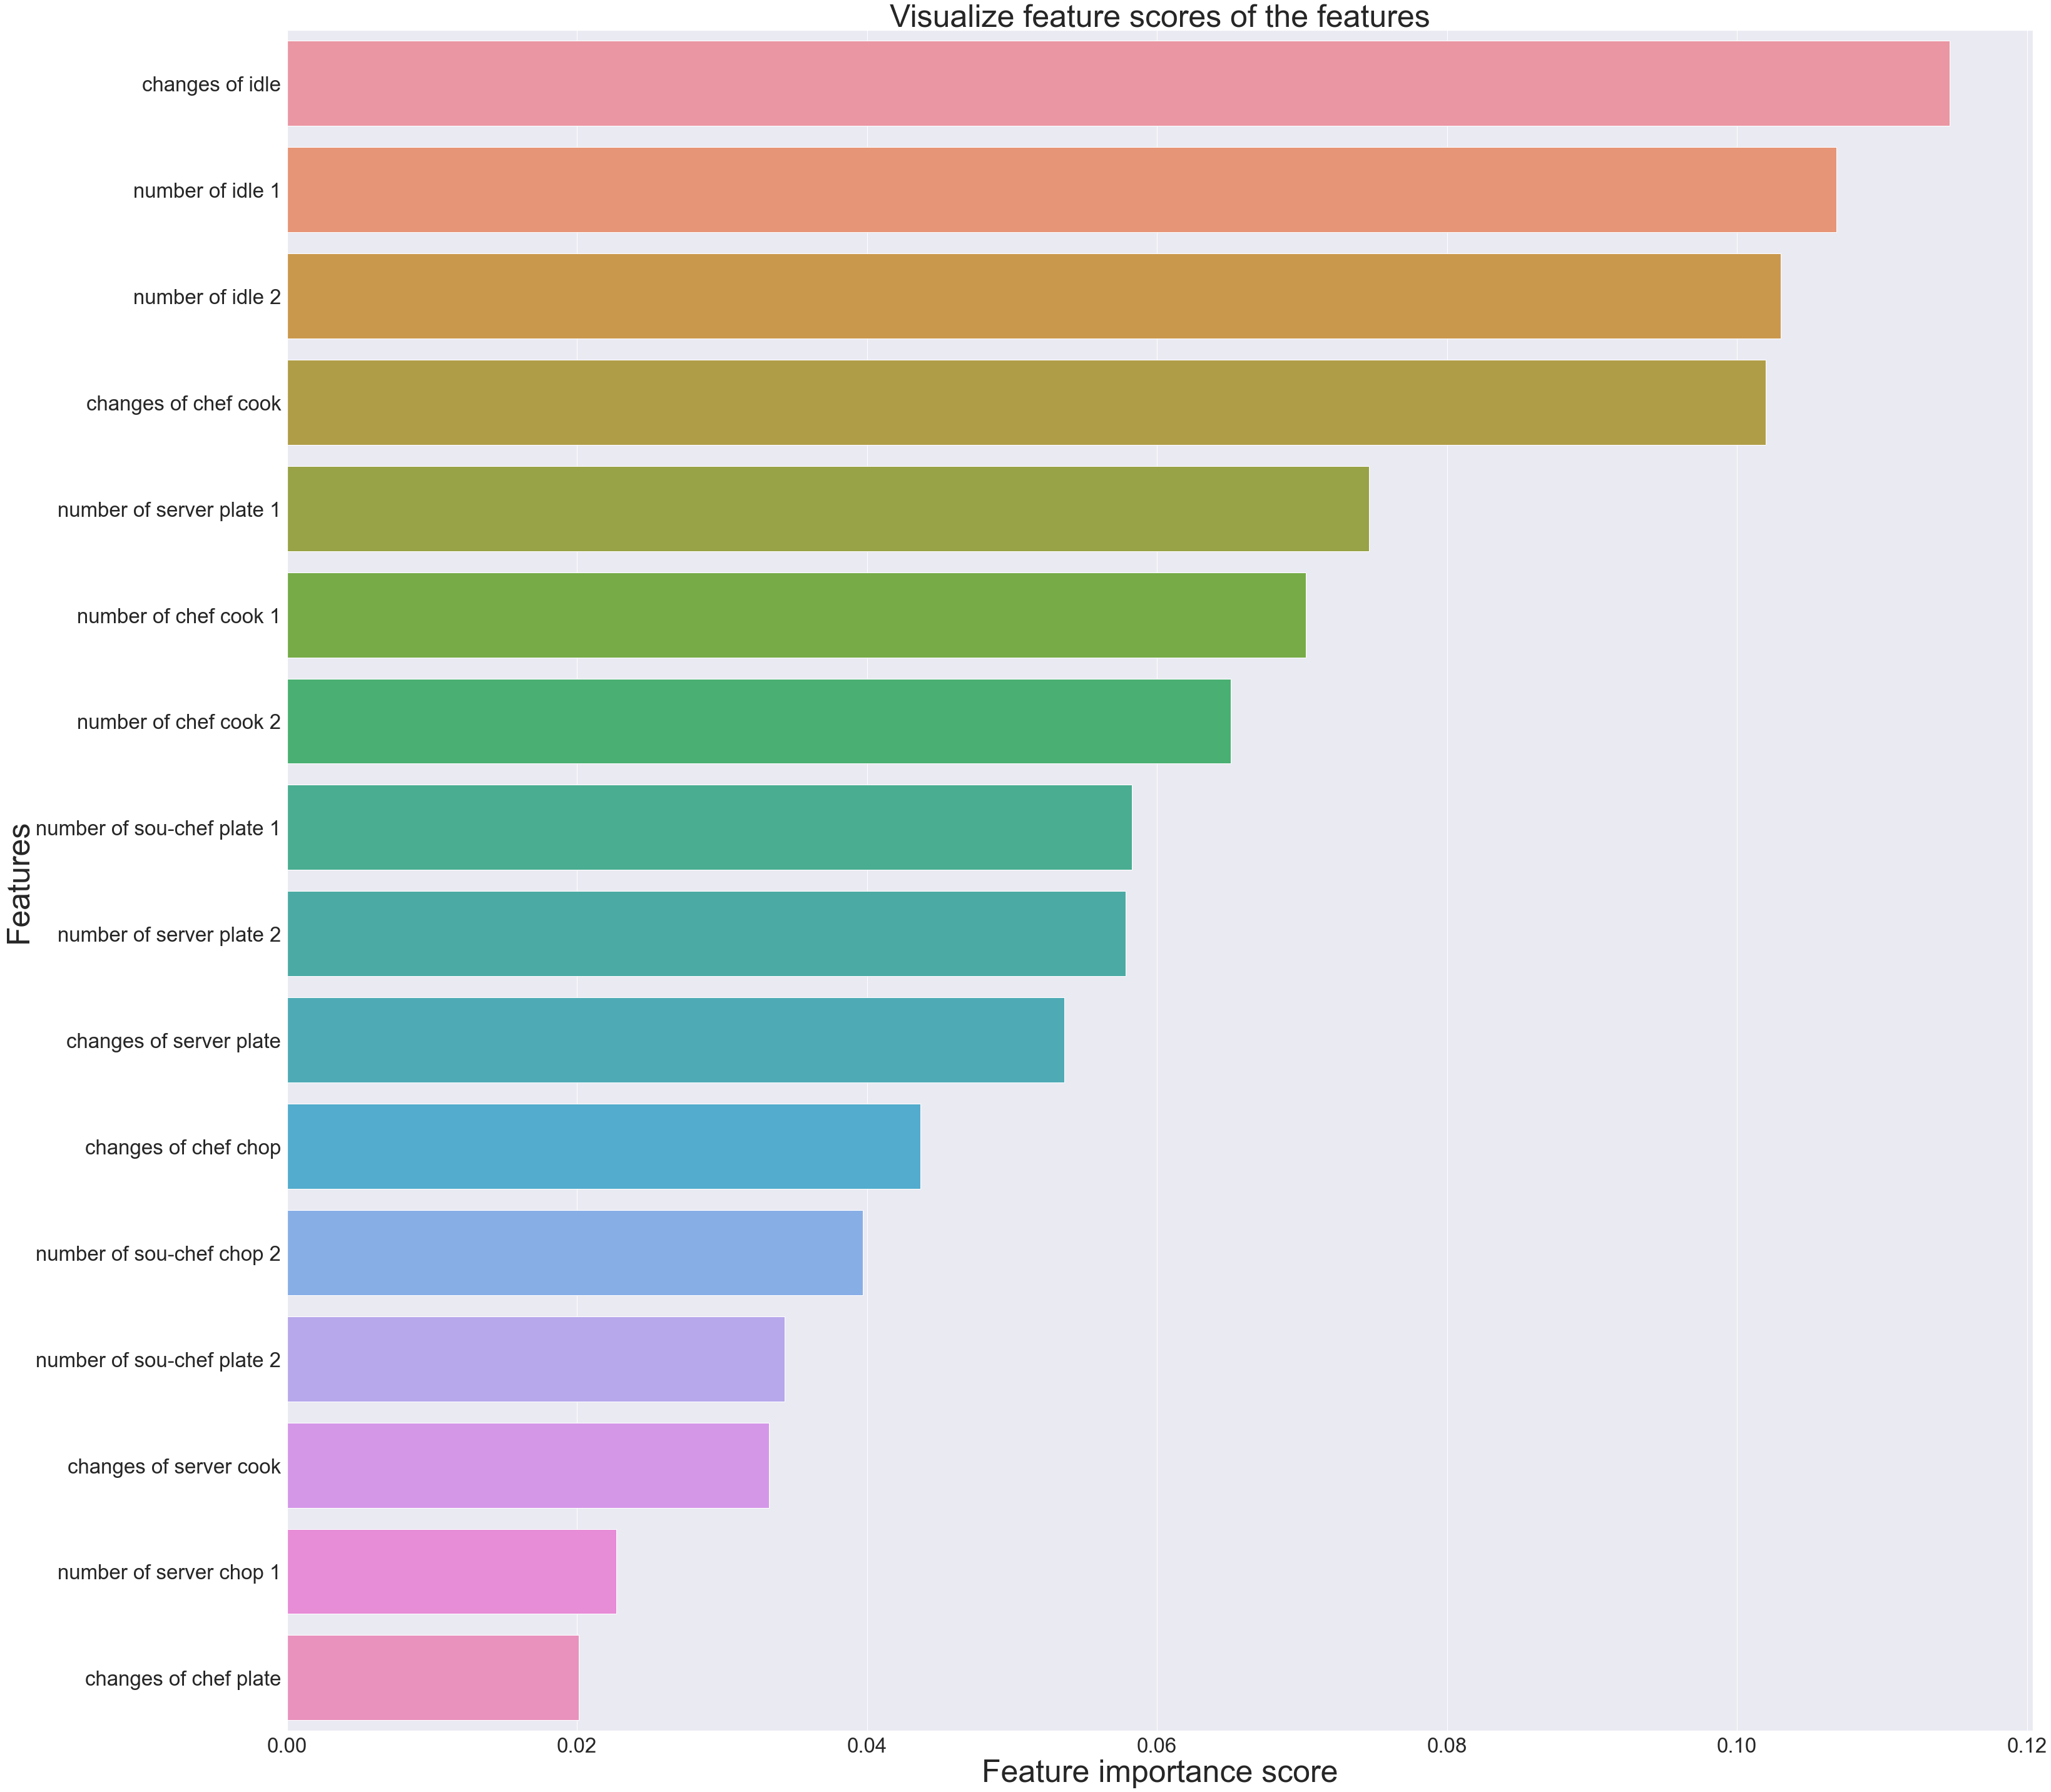

In [64]:
# {'criterion': 'gini',
#  'max_depth': 5,
#  'min_samples_leaf': 2,
#  'min_samples_split': 5,
#  'n_estimators': 100}
clf = RandomForestClassifier(criterion='gini', max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Creating a seaborn bar plot
sns.set(font_scale=3)
f, ax = plt.subplots(figsize=(50, 50))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df, capsize=1.5)
ax.set_title("Visualize feature scores of the features", fontsize=50)
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score", fontsize=50)
ax.set_ylabel("Features", fontsize=50)
plt.show()
fig = ax.get_figure()
fig.savefig("feature_importance-naive.pdf",dpi=300);


### SVM

In [65]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [66]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf2 = SVC(probability=True, random_state=42, kernel='rbf')
clf2.fit(X_train, y_train)

param_grid = { 
    'C': [0.1, 0.5, 1, 2, 3, 4, 5],
    'gamma': [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
}

SVC = GridSearchCV(estimator=clf2, param_grid = param_grid, cv=5)
SVC.fit(X_train, y_train)
SVC.score(X_val, y_val)


0.7647058823529411

In [67]:
SVC.best_params_

{'C': 0.1, 'gamma': 0.001}

In [77]:
from sklearn.cluster import KMeans

In [88]:
def clustering_label(model):
    s1_prob_pred = pd.DataFrame(model.predict_proba(X_s1))
    s1_prob_pred['class'] = 's1'
    t1_prob_pred = pd.DataFrame(model.predict_proba(X_t1))
    t1_prob_pred['class'] = 't1'
    merge_s1_t1 = s1_prob_pred.append(t1_prob_pred, ignore_index = True)
    kmeans = KMeans(n_clusters = 5, random_state = 42)
    labels = kmeans.fit_predict(merge_s1_t1.iloc[:,0:3])
    merge_s1_t1['cluster'] = labels
    return merge_s1_t1
    

In [89]:
clustering_label(SVC)

,0,1,2,class,cluster
0,0.082336,0.264863,0.652801,s1,1
1,0.072980,0.251631,0.675389,s1,1
2,0.068961,0.263900,0.667139,s1,1
3,0.084333,0.249851,0.665816,s1,1
4,0.092216,0.240448,0.667336,s1,1
...,...,...,...,...,...
483,0.066572,0.135320,0.798108,t1,3
484,0.081382,0.257793,0.660825,t1,1
485,0.096884,0.282827,0.620289,t1,4
486,0.084465,0.211420,0.704116,t1,0


### ROC

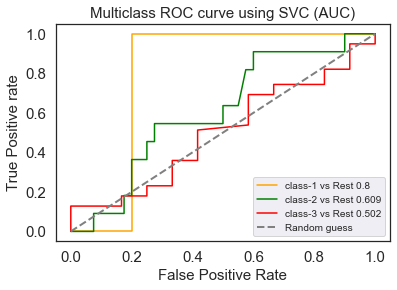

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('seaborn')

from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.metrics import roc_auc_score

pred = SVC.predict(X_val)
pred_prob = SVC.predict_proba(X_val)
fpr = {}
tpr = {}
thresh ={}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val, pred_prob[:,i], pos_label=i+1)

a = []
classes = RF.classes_
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_val.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_val]
    df_aux['prob'] = pred_prob[:, i]
    df_aux = df_aux.reset_index(drop = True)

    
    # Calculates the ROC AUC OvR
    a.append(round(roc_auc_score(df_aux['class'], df_aux['prob']),3))
#     print(roc_auc_score(df_aux['class'], df_aux['prob']))    
    
sns.set_style("white")
plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label=f'class-1 vs Rest {a[0]}')
plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label=f'class-2 vs Rest {a[1]}')
plt.plot(fpr[2], tpr[2], linestyle='-',color='red', label=f'class-3 vs Rest {a[2]}')

plt.title('Multiclass ROC curve using SVC (AUC)',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive rate',fontsize=15)
plt.tick_params(labelsize=15)
sns.set(rc={'figure.figsize':(6,6)})
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='grey', label='Random guess')
# plt.legend(loc='best',fontsize=10)
plt.legend(loc="lower right", fontsize=10)
plt.savefig("SVC.pdf",dpi=300);

### Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
param_grid = { 
    "criterion": ["entropy", "gini"],
    "max_depth": [3,4,5,6,7,8],
    'min_samples_split': [3,4,5,6],
    'min_samples_leaf':  [1,2,3,4,5,6],
}

In [73]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree = decision_tree.fit(X_train, y_train)

In [74]:
DT = GridSearchCV(estimator=decision_tree, param_grid = param_grid, cv=5)
DT.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                     

In [75]:
DT.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [76]:
DT.score(X_val, y_val)

0.6274509803921569

### ROC

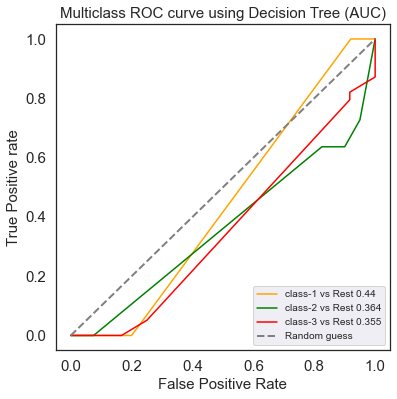

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('seaborn')

from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.metrics import roc_auc_score

pred = DT.predict(X_val)
pred_prob = DT.predict_proba(X_val)
fpr = {}
tpr = {}
thresh ={}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val, pred_prob[:,i], pos_label=i+1)

a = []
classes = clf.classes_
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_val.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_val]
    df_aux['prob'] = pred_prob[:, i]
    df_aux = df_aux.reset_index(drop = True)

    
    # Calculates the ROC AUC OvR
    a.append(round(roc_auc_score(df_aux['class'], df_aux['prob']),3))
#     print(roc_auc_score(df_aux['class'], df_aux['prob']))    
    
sns.set_style("white")
plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label=f'class-1 vs Rest {a[0]}')
plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label=f'class-2 vs Rest {a[1]}')
plt.plot(fpr[2], tpr[2], linestyle='-',color='red', label=f'class-3 vs Rest {a[2]}')

plt.title('Multiclass ROC curve using Decision Tree (AUC)',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive rate',fontsize=15)
plt.tick_params(labelsize=15)
sns.set(rc={'figure.figsize':(6,6)})
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='grey', label='Random guess')
# plt.legend(loc='best',fontsize=10)
plt.legend(loc="lower right", fontsize=10)
plt.savefig("DT.pdf",dpi=300);

### XGBoost

In [79]:
!pip install xgboost
import xgboost as xgb

     |████████████████████████████████| 1.8 MB 5.5 MB/s eta 0:00:01


In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

param_grid = { 
    'n_estimators': [80,90,100,105,110,115],
    'learning_rate': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1],
    'max_depth':[3,4,5]
}
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train.values, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [91]:
XGB = GridSearchCV(estimator=xgb_model, param_grid = param_grid, cv=5)
XGB.fit(X_train.values, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_...
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                  

In [92]:
y_val = le.fit_transform(y_val)
XGB.score(X_val.values, y_val)

0.6078431372549019

In [93]:
XGB.best_params_

{'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 80}

### ROC

In [94]:
pred = XGB.predict(X_val)
pred_prob = XGB.predict_proba(X_val)
fpr = {}
tpr = {}
thresh ={}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val, pred_prob[:,i], pos_label=i+1)

a = []
classes = clf.classes_
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_val.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_val]
    df_aux['prob'] = pred_prob[:, i]
    df_aux = df_aux.reset_index(drop = True)

    
    # Calculates the ROC AUC OvR
    a.append(round(roc_auc_score(df_aux['class'], df_aux['prob']),3))
#     print(roc_auc_score(df_aux['class'], df_aux['prob']))    
    
sns.set_style("white")
plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label=f'class-1 vs Rest {a[0]}')
plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label=f'class-2 vs Rest {a[1]}')
plt.plot(fpr[2], tpr[2], linestyle='-',color='red', label=f'class-3 vs Rest {a[2]}')

plt.title('Multiclass ROC curve using XGBoost (AUC)',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive rate',fontsize=15)
plt.tick_params(labelsize=15)
sns.set(rc={'figure.figsize':(6,6)})
plt.plot([0, 1], [1, 1], linestyle='--', lw=2, color='grey', label='Random guess')
# plt.legend(loc='best',fontsize=10)
plt.legend(loc="lower right", fontsize=10)
plt.savefig("XGBoost.pdf",dpi=300);

/Users/yuanruizhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

### Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression(solver = 'lbfgs', max_iter=1e5, random_state=42)

tuned_parameters = {
               'C': [0.05,0.1,0.15,0.2,0.25,0.3] ,
              'penalty':['l2']
                   }
LR= GridSearchCV(LR_model, tuned_parameters,cv=5)
LR.fit(X_train, y_train)
LR.score(X_val, y_val)

0.7058823529411765

In [96]:
LR.best_params_

{'C': 0.05, 'penalty': 'l2'}

### ROC

In [97]:
pred = LR.predict(X_val)
pred_prob = LR.predict_proba(X_val)
fpr = {}
tpr = {}
thresh ={}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val, pred_prob[:,i], pos_label=i+1)

a = []
classes = clf.classes_
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_val.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_val]
    df_aux['prob'] = pred_prob[:, i]
    df_aux = df_aux.reset_index(drop = True)

    
    # Calculates the ROC AUC OvR
    a.append(round(roc_auc_score(df_aux['class'], df_aux['prob']),3))
#     print(roc_auc_score(df_aux['class'], df_aux['prob']))    
    
sns.set_style("white")
plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label=f'class-1 vs Rest {a[0]}')
plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label=f'class-2 vs Rest {a[1]}')
plt.plot(fpr[2], tpr[2], linestyle='-',color='red', label=f'class-3 vs Rest {a[2]}')

plt.title('Multiclass ROC curve using Logistic Regression (AUC)',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive rate',fontsize=15)
plt.tick_params(labelsize=15)
sns.set(rc={'figure.figsize':(6,6)})
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='grey', label='Random guess')
# plt.legend(loc='best',fontsize=10)
plt.legend(loc="lower right", fontsize=10)
plt.savefig("LR.pdf",dpi=300);

/Users/yuanruizhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [1384]:
X_train

,chef_cook_x,chef_cook_y,sou_chop_y,sou_plate_x,sou_plate_y,server_chop_x,server_plate_x,server_plate_y,idle_x,idle_y,0,1,2,7,8,9
24,5,6,1,1,0,1,3,5,42,45,-1,1,0,0,2,3
6,2,2,2,3,1,2,5,2,64,68,-1,0,1,0,-3,4
222,2,3,2,2,1,1,2,2,60,58,-1,1,1,0,0,-2
208,3,2,1,0,1,0,4,2,51,54,0,-1,1,1,-2,3
236,3,3,1,1,1,2,3,3,45,48,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,6,6,4,0,0,0,4,4,42,43,-1,0,0,0,0,1
17,1,2,2,0,1,1,11,2,74,63,-1,1,1,0,-9,-11
166,3,3,1,1,1,2,3,3,45,45,0,0,0,0,0,0
72,3,2,1,0,1,0,4,2,54,54,-1,-1,1,1,-2,0


### OLD VERSION, PLEASE IGNORE IT

In [1385]:
# a = []
# b = []
# for i in np.arange(1,15):
#     m1 = RandomForestClassifier(max_depth=i, random_state=42)
#     m1.fit(X_train, y_train_1)
#     a.append(i)
#     b.append(m1.score(X_train, y_train_1))
# m1 = RandomForestClassifier(max_depth=np.argmax(b)+1, random_state=42)
# m1.fit(X_train, y_train_1)
# m1.score(X_test, y_test_1)
# b

In [1386]:
# m1 = RandomForestClassifier(max_depth=15, random_state=42)
# m1.fit(X_train, y_train_1)
# m1.predict_proba(X_train)

In [1387]:
# from sklearn.linear_model import LogisticRegression ###l2
# clf = LogisticRegression(random_state=0).fit(X_train, y_train_1)
# clf.score(X_train, y_train_1)

In [1388]:
# clf.predict_proba(X_train)

In [1389]:
# import tensorflow as tf
# tf.keras.losses.SparseCategoricalCrossentropy()
# clf.predict_proba(X_test)

In [1390]:
# from sklearn.neighbors import KNeighborsClassifier
# a = []
# for i in np.arange(1,10):
#     neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train_1)
#     a.append(neigh.score(X_train, y_train_1))
# neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train_1)
# neigh.score(X_test, y_test_1)

In [1391]:
# a

In [1392]:
# neigh = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train_1)
# neigh.predict_proba(X_test)

In [1393]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
# clf.fit(X_train, y_train_1)
# clf.score(X_test, y_test_1)
# clf.predict_proba(X_test)

In [1394]:
# m1.predict(X_train)

In [1395]:
# y_train_1

In [1396]:
# from sklearn.model_selection import cross_val_score
# from sklearn.tree import DecisionTreeClassifier

In [1397]:
# clf = DecisionTreeClassifier(random_state=42, max_depth=2)

In [1398]:
# clf.fit(X_train, y_train_1)

In [1399]:
# clf.score(X_train, y_train_1)

In [1400]:
# clf.score(X_test, y_test_1)

In [1401]:
# sum(dat["label_1_x"] == 5)

## MLP

In [1402]:
# import ast
# class allaction():
    
#     def __init__(self, file):
#         self.df = pd.read_csv(file) 
#         self.orderId, self.taskId, self.taskTicks, self.workerId, self.workerTicks = [], [], [], [], []
#         self.ResponseId, self.Round, self.Tick = [], [], []
#     #taskId: 0~idle, 1~chop, 2~cook, 3~plate
#     #workerId: 0~chef, 1~sou-chef, 2~server
#     #           0~sou-chef, 1~server, CHANGE!!! 0~idle, 1~chef, 2~sou-chef, 3~server
    
#     def parse(self):
#         # all id + 1, leaving 0 to be idle
#         action = self.df
#         for i in np.arange(action.shape[0]):
#             row = action.iloc[i,:]
#             for act in ["action1", "action2", "action3"]:
#                 # when there is no action in this act
#                 if type(row[act]) != str:
#                     self.orderId.append(0)
#                     self.taskId.append(0)
#                     self.taskTicks.append(0)
#                     self.workerId.append(0)
#                     self.workerTicks.append(0)
#                 else:
#                     a = ast.literal_eval(row[act])
#                     self.orderId.append(a["order_id"] + 1)
#                     self.taskId.append(a["task_id"] + 1)
#                     self.taskTicks.append(a["task_ticks"])
#                     self.workerId.append(a["worker_id"] + 1)
#                     self.workerTicks.append(a["worker_ticks"])

#                 self.ResponseId.append(row["ResponseId"])
#                 self.Round.append(row["round"])
#                 self.Tick.append(row["tick"])
                
#     def get(self):
#         self.parse()
#         d = {
#             "ResponseId": self.ResponseId,
#             "round": self.Round,
#             "tick": self.Tick,
#             "orderId": self.orderId, 
#             "taskId": self.taskId, 
#             "taskTicks": self.taskTicks, 
#             "workerId": self.workerId, 
#             "workerTicks": self.workerTicks
#         }
#         return pd.DataFrame(d)



In [1403]:
# pwd

In [1404]:
# file =  "../data/phase2/phase2_action.csv"
# action = allaction(file).get()
# action = action[action["round"] <= 2]
# action = action.drop("workerTicks", axis=1)
# action

In [1405]:
# t1 = action.drop("orderId", axis=1)
# t2 = t1.merge(pd.get_dummies(t1["taskId"]), left_index=True, right_index=True).drop("taskId", axis=1).rename(
#     columns={0:"idle", 1:"chop", 2:"cook", 3:"plate"})
# df = t2.merge(pd.get_dummies(t2["workerId"]), left_index=True, right_index=True).drop("workerId", axis=1).rename(
#     columns={0:"idle", 1:"chef", 2:"sou-chef", 3:"server"})
# df.drop("taskTicks", axis=1).groupby(["ResponseId", "round", "tick"]).sum()

In [1406]:
# import torch
# from tqdm import tqdm
# class Feedforward(torch.nn.Module):
#         def __init__(self, input_size):
#             super(Feedforward, self).__init__()
#             self.input_size = input_size
#             self.hidden_size  = 30
#             self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
#             self.fc3 = torch.nn.Linear(30, 50)
#             self.fc4 = torch.nn.Linear(50, 60)
#             self.fc11 = torch.nn.Linear(60, 50)
#             self.fc5 = torch.nn.Linear(50, 30)
#             self.fc6 = torch.nn.Linear(30, 15)
#             self.fc7 = torch.nn.Linear(15, 10)
#             self.fc8 = torch.nn.Linear(10, 5)
#             self.relu = torch.nn.ReLU()
# #             self.fc2 = torch.nn.Linear(5, 1)
#             self.sigmoid = torch.nn.Softmax(dim=1)
#         def forward(self, x):
#             hidden = self.fc1(x)
#             relu = self.relu(hidden)
            
#             hidden = self.fc3(relu)
#             relu = self.relu(hidden)
            
#             hidden = self.fc4(relu)
#             relu = self.relu(hidden)
            
#             hidden = self.fc11(relu)
#             relu = self.relu(hidden)
            
#             hidden = self.fc5(relu)
#             relu = self.relu(hidden)
            
#             hidden = self.fc6(relu)
#             relu = self.relu(hidden)

            
#             hidden = self.fc7(relu)
#             relu = self.relu(hidden)
        
#             output = self.fc8(relu)
#             output = self.sigmoid(output)
#             return output

In [1407]:
# from sklearn.ensemble import AdaBoostClassifier

In [1408]:
# b

In [1409]:


# a = []
# b = []
# for i in np.arange(100,1000):
#     clf = AdaBoostClassifier(n_estimators=i, random_state=0)
#     clf.fit(X_train,y_train_1)
#     a.append(i)
#     b.append(clf.score(X_test, y_test_1))
# max(b)


In [1410]:
# df.groupby(["ResponseId", "round", "tick"]).agg(lambda x:x.iloc[0]).merge(
#     df.groupby(["ResponseId", "round", "tick"]).agg(lambda x:x.iloc[1]).merge(
#         df.groupby(["ResponseId", "round", "tick"]).agg(lambda x:x.iloc[2]),left_index=True,right_index=True),
#             left_index=True,right_index=True)

In [1411]:
# model = Feedforward(num_feature*3)
# criterion = torch.nn.CrossEntropyLoss()

# optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

# def padding(arr):
#     b = []
#     for i in np.array(arr):
#         a = [0,0,0,0,0,0,0]
#         a[i-1] = 1
#         b.append(a)
#     return b
# y_test = padding(np.array(y_test_1))
# y_train = padding(np.array(y_train_1))

In [1412]:
# def padding(arr):
#     b = []
#     for i in np.array(arr):
#         a = [0,0,0,0,0,0,0]
#         a[i-1] = 1
#         b.append(a)
#     return b
# y_test = padding(np.array(y_test_1))
# y_train = padding(np.array(y_train_1))

In [1413]:
# model.eval()
# y_pred = model(torch.FloatTensor(np.array(X_test)))
# before_train = criterion(y_pred.squeeze(), torch.FloatTensor(y_test))
# print('Test loss before training' , before_train.item())

In [1414]:
# action = action[action["round"] <= 2]
# action["workerId"] = action["workerId"] + 1
# action = action.drop("workerTicks", axis=1)
# action

In [1415]:
# t1

In [1416]:
# model.train()
# epoch = 10000
# loss_train = []
# loss_val = []
# for epoch in tqdm(range(epoch)):
#     optimizer.zero_grad()
#     y_pred = model(torch.FloatTensor(np.array(X_train)))
#     loss = criterion(y_pred.squeeze(), torch.FloatTensor(y_train))
#     loss_train.append(loss.item())
    
#     y_pred_2 = model(torch.FloatTensor(np.array(X_test)))
#     loss_val.append(criterion(y_pred_2.squeeze(), torch.FloatTensor(y_test)).item())

#     loss.backward()
#     optimizer.step()

In [1417]:
# t2

In [1418]:
# model.eval()
# y_pred = model(torch.FloatTensor(np.array(X_test)))
# after_train = criterion(y_pred.squeeze(), torch.FloatTensor(y_test)) 
# print('Test loss after Training' , after_train.item())

In [1419]:
# model.eval()
# y_pred = model(torch.FloatTensor(np.array(X_train)))
# after_train = criterion(y_pred.squeeze(), torch.FloatTensor(y_train)) 
# print('Test loss after Training' , after_train.item())

In [1420]:
# com = pd.DataFrame({
#     "types": ["train" for _ in np.arange(10000)] + ["val" for _ in np.arange(10000)],
#     "mse": loss_train + loss_val,
#     "epoch": np.arange(1,10001).tolist() + np.arange(1,10001).tolist()
# })
# com

In [1421]:
# import seaborn as sns
# sns.lineplot(data=com, x="epoch", y="mse", hue="types")

In [1422]:
# action["workerId"] + 1

In [1423]:
# sum(dat["label_1_x"] == 4)

In [1424]:
# sum(dat["label_1_x"] == 3)

In [1425]:
# sum(dat["label_1_x"] == 2)

In [1426]:
# sum(dat["label_1_x"] == 1)

In [1427]:
# model(torch.FloatTensor(np.array(X_train)))

In [1428]:
# y_train

In [1429]:
# for p in model.parameters():
#     print(p)

In [1430]:
# torch.FloatTensor(np.array(X_test))

In [1431]:
# y_pred.squeeze()

In [1432]:
# y_train_1